In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [2]:
!pip install qiskit
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [3]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw MNIST Dataset

Load the dataset.

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Flatten the dataset from 28 x 28 image to 784 x 1 vector

In [6]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

# Sanity check

print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Separate the dataset into classes so we can choose which ones we would like to use easier later.

In [11]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [12]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [13]:
def binary_classification_data_generator(num_sample, mult_test, n_class, class_list):
    X_train = x_train_list[class_list[0]][:num_sample, :]
    X_test = x_test_list[class_list[0]][:int(mult_test*num_sample), :]

    Y_train = np.zeros((n_class*X_train.shape[0],), dtype=int)
    Y_test = np.zeros((n_class*X_test.shape[0],), dtype=int)

    for i in range(n_class-1):
      X_train = np.concatenate((X_train, x_train_list[class_list[i+1]][:num_sample, :]), axis=0)
      Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

      X_test = np.concatenate((X_test, x_test_list[class_list[i+1]][:int(mult_test*num_sample), :]), axis=0)
      Y_test[int(mult_test*num_sample*(i+1)):int(mult_test*num_sample*(i+2))] = int(i+1)


    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)

    return X_train, Y_train, X_test, Y_test

In [14]:
num_sample = 200
n_class = 2
mult_test = 2.5

In [15]:
X_train01, Y_train01, X_test01, Y_test01 = binary_classification_data_generator(num_sample, mult_test, n_class, [0,1])

# Sanity check
print(X_train01.shape, Y_train01.shape)
print(X_test01.shape, Y_test01.shape)

plt.imshow

(400, 784) (400, 2)
(1000, 784) (1000, 2)


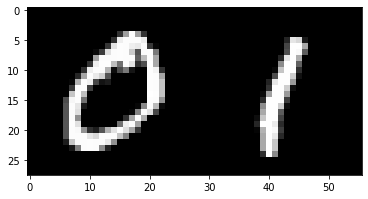

In [18]:
plt.imshow(np.concatenate((X_train01[0].reshape(28,28), X_train01[-1].reshape(28,28)), axis=1), cmap='gray')

In [19]:
X_train36, Y_train36, X_test36, Y_test36 = binary_classification_data_generator(num_sample, mult_test, n_class, [3,6])

# Sanity check
print(X_train36.shape, Y_train36.shape)
print(X_test36.shape, Y_test36.shape)

plt.imshow

(400, 784) (400, 2)
(1000, 784) (1000, 2)


<function matplotlib.pyplot.imshow>

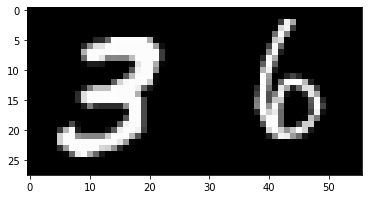

In [20]:
plt.imshow(np.concatenate((X_train36[0].reshape(28,28), X_train36[-1].reshape(28,28)), axis=1), cmap='gray')

# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [21]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [22]:
X_train01, mu_train01, std_train01 = normalize(X_train01)
X_test01 = (X_test01 - mu_train01)/(std_train01 + 1e-8)

# Sanity check
print(X_train01.shape, Y_train01.shape)
print(X_test01.shape, Y_test01.shape)

(400, 784) (400, 2)
(1000, 784) (1000, 2)


In [23]:
X_train36, mu_train36, std_train36 = normalize(X_train36)
X_test36 = (X_test36 - mu_train36)/(std_train36 + 1e-8)

# Sanity check
print(X_train36.shape, Y_train36.shape)
print(X_test36.shape, Y_test36.shape)

(400, 784) (400, 2)
(1000, 784) (1000, 2)


## PCA

In [24]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

Let's use 6 principal components.

In [26]:
num_component = 6
pca01 = PCA(n_components=num_component, svd_solver='full')
pca36 = PCA(n_components=num_component, svd_solver='full')

In [27]:
pca01.fit(X_train01)
pca36.fit(X_train36)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [28]:
print(np.cumsum(pca01.explained_variance_ratio_))
print(np.cumsum(pca36.explained_variance_ratio_))

[0.21719476 0.32237275 0.37662654 0.42807777 0.46964521 0.50021544]
[0.11156001 0.18207355 0.23733116 0.2742964  0.30856879 0.34190522]


In [29]:
X_train01 = pca01.transform(X_train01)
X_test01 = pca01.transform(X_test01)

# Sanity check
print(X_train01.shape, Y_train01.shape)
print(X_test01.shape, Y_test01.shape)

(400, 6) (400, 2)
(1000, 6) (1000, 2)


In [30]:
X_train36 = pca36.transform(X_train36)
X_test36 = pca36.transform(X_test36)

# Sanity check
print(X_train36.shape, Y_train36.shape)
print(X_test36.shape, Y_test36.shape)

(400, 6) (400, 2)
(1000, 6) (1000, 2)


## Norm

Normalize the feature vectors so every feature vector has length of 1.

In [31]:
X_train01 = (X_train01.T / np.sqrt(np.sum(X_train01 ** 2, -1))).T
X_test01 = (X_test01.T / np.sqrt(np.sum(X_test01 ** 2, -1))).T

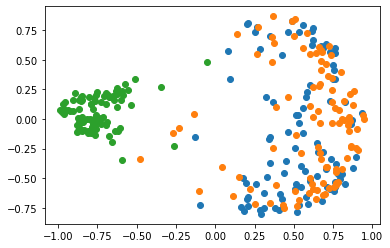

In [33]:
plt.scatter(X_train01[:100, 0], X_train01[:100, 1])
plt.scatter(X_train01[100:200, 0], X_train01[100:200, 1])
plt.scatter(X_train01[200:300, 0], X_train01[200:300, 1])

In [34]:
X_train36 = (X_train36.T / np.sqrt(np.sum(X_train36 ** 2, -1))).T
X_test36 = (X_test36.T / np.sqrt(np.sum(X_test36 ** 2, -1))).T

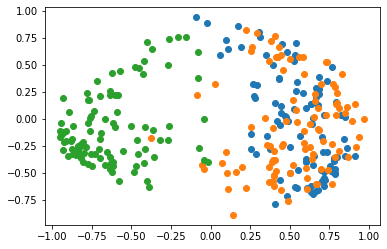

In [35]:
plt.scatter(X_train36[:100, 0], X_train36[:100, 1])
plt.scatter(X_train36[100:200, 0], X_train36[100:200, 1])
plt.scatter(X_train36[200:300, 0], X_train36[200:300, 1])

# Data Re-uploading Classifier

In [36]:
from qiskit import *
import numpy as np

# Set a random seed
np.random.seed(42)

A function to construct parametrized quantum circuit based on the reference [1] paper.

In [38]:
def drc_circuit(x_sample, parameters, num_features, layer=1):
    q_reg = QuantumRegister(1)
    c_reg = ClassicalRegister(1)
    circuit = QuantumCircuit(q_reg, c_reg)
    
    # Layer iteration
    for i in range(layer):
        # Gate iteration
        for j in range(int(num_features/3)):
            circuit.u(*(parameters[3*j:3*(j+1)] * x_sample[3*j:3*(j+1)] + parameters[3*j+num_features:3*(j+1)+num_features]), 0)
    
    circuit.measure(0,0)
    
    return circuit

Specify the number of layer and initialize random starting parameters. Then plot the circuit with one of the samples from dataset.

In [41]:
num_features = 6
num_layer = 1

params = np.random.uniform(size=(2*num_features*num_layer + 2))

drc_circuit(X_train01[0], params, num_features).draw()

┌───────────────────────────┐┌─────────────────────────────┐┌─┐
q1_0: ┤ U(1.4416,0.78665,0.34113) ├┤ U(0.072678,0.66561,0.28024) ├┤M├
      └───────────────────────────┘└─────────────────────────────┘└╥┘
c1: 1/═════════════════════════════════════════════════════════════╩═
                                                                   0

Functions below are to calculate the weighted fidelity cost function and to make prediction based on reference [1].

In [55]:
def weighted_fidelity_cost_function(params, X_train, Y_train, backend, L=1, num_features=6, shots=2000):
    loss = 0
    
    # Training sample iteration
    for k in range(len(X_train)):
        circuit = drc_circuit(X_train[k], params, num_features, layer=L)
        
        t_circ = transpile(circuit, backend)
        qobj = assemble(t_circ, shots=shots)
        job = backend.run(qobj)
        result = job.result().get_counts(circuit)

        counts = np.array(list(result.values()))
        # Pauli-Z eigenvalue
        states = np.array([0, -1])
        # Compute probabilities for each state
        probabilities = counts / shots
        # Get state expectation
        z_expectation = np.sum(states * probabilities)
        # Get weighted fidelity
        fidel_0 = params[-2]*(1 + z_expectation)/2
        fidel_1 = params[-1]*(1 - z_expectation)/2
        # Calculate the loss from the sample
        loss += ((fidel_0 - Y_train[k,0])**2 + (fidel_1 - Y_train[k,1])**2)/2

    loss = loss/len(X_train)
    
    return loss


def drc_pred(params, X, backend, L=1, num_features=6, shots=2000):
    pred = []

    # Sample iteration
    for k in range(len(X)):
        circuit = drc_circuit(X[k], params, num_features, layer=L)
        
        t_circ = transpile(circuit, backend)
        qobj = assemble(t_circ, shots=shots)
        job = backend.run(qobj)
        result = job.result().get_counts(circuit)

        counts = np.array(list(result.values()))
        # Pauli-Z eigenvalue
        states = np.array([0, -1])
        # Compute probabilities for each state
        probabilities = counts / shots
        # Get state expectation
        z_expectation = np.sum(states * probabilities)
        # Get weighted fidelity
        fidel_0 = params[-2]*(1 + z_expectation)/2
        fidel_1 = params[-1]*(1 - z_expectation)/2

        pred += [[fidel_0, fidel_1]]

    return np.array(pred)

## Circuit Training

Specify the number of layer, backend, and initialize random starting parameters.

In [50]:
shots=2000
backend = Aer.get_backend('qasm_simulator')
num_layer = 1
num_features = 6
params = np.random.uniform(size=(2*num_features*num_layer + 2))

Let's optimize the cost function.

In [66]:
from qiskit.aqua.components.optimizers import COBYLA
import scipy

### 0 vs 1

In [68]:
opt_params_01 = scipy.optimize.minimize(fun=weighted_fidelity_cost_function, x0=params, method='COBYLA',
                                            args=(X_train01, Y_train01, backend, num_layer, num_features, shots),
                                            options={'maxiter':1000})

print(opt_params_01)

     fun: 0.06281158373097341
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 183
  status: 1
 success: True
       x: array([ 1.93966004,  0.09646827,  0.50327948, -0.30347725,  1.9594358 ,
        0.03578425, -0.36640969,  1.14286064, -0.18229261,  0.89013173,
        2.62548436,  1.84547588,  2.09409592,  0.79055494])


In [69]:
Y_pred_train = drc_pred(opt_params_01['x'], X_train01, backend, L=num_layer, num_features=num_features, shots=shots)
Y_pred_test = drc_pred(opt_params_01['x'], X_test01, backend, L=num_layer, num_features=num_features, shots=shots)

train_acc = (np.argmax(Y_pred_train, axis=1) == np.argmax(Y_train01, axis=1)).sum()/len(Y_train01)
test_acc = (np.argmax(Y_pred_test, axis=1) == np.argmax(Y_test01, axis=1)).sum()/len(Y_test01)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9875
Test Accuracy: 0.992


Exploring the accuracy as function of the number of layer.

In [74]:
train_acc_list01 = []
test_acc_list01 = []
train_loss_list01 = []
test_loss_list01 = []

for i in range(5):
    opt_params_01 = scipy.optimize.minimize(fun=weighted_fidelity_cost_function, x0=params, method='COBYLA',
                                            args=(X_train01, Y_train01, backend, i+1, num_features, shots),
                                            options={'maxiter':1000})
    
    print("Number of layer: " + str(i+1) + ", status: finished.")
    
    Y_pred_train = drc_pred(opt_params_01['x'], X_train01, backend, L=num_layer, num_features=num_features, shots=shots)
    Y_pred_test = drc_pred(opt_params_01['x'], X_test01, backend, L=num_layer, num_features=num_features, shots=shots)

    train_acc = (np.argmax(Y_pred_train, axis=1) == np.argmax(Y_train01, axis=1)).sum()/len(Y_train01)
    test_acc = (np.argmax(Y_pred_test, axis=1) == np.argmax(Y_test01, axis=1)).sum()/len(Y_test01)

    train_acc_list01 += [train_acc]
    test_acc_list01 += [test_acc]

    train_loss = weighted_fidelity_cost_function(opt_params_01['x'], X_train01, Y_train01, backend, L=num_layer, num_features=num_features, shots=shots)
    test_loss = weighted_fidelity_cost_function(opt_params_01['x'], X_test01, Y_test01, backend, L=num_layer, num_features=num_features, shots=shots)

    train_loss_list01 += [train_loss]
    test_loss_list01 += [test_loss]

Number of layer:1, status: finished.
Number of layer:2, status: finished.
Number of layer:3, status: finished.
Number of layer:4, status: finished.
Number of layer:5, status: finished.


<function matplotlib.pyplot.show>

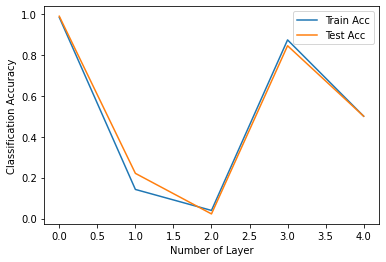

In [75]:
plt.plot(train_acc_list01, label='Train Acc')
plt.plot(test_acc_list01, label='Test Acc')

plt.xlabel('Number of Layer')
plt.ylabel('Classification Accuracy')
plt.legend()
plt.show()

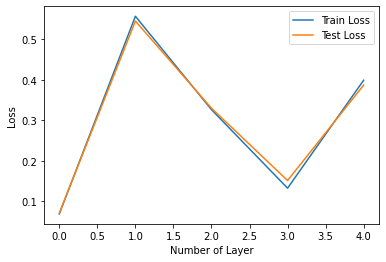

In [77]:
plt.plot(train_loss_list01, label='Train Loss')
plt.plot(test_loss_list01, label='Test Loss')

plt.xlabel('Number of Layer')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
import pandas as pd

d = {'Training Acc': [0.9875, 0.9175], 'Testing Acc': [0.992, 0.915]}
pd.DataFrame(data=d, index=["Qiskit (COBYLA, QASM Simulator)", "PennyLane (Adam, PennyLane's Statevector Simulator)"])

,Training Acc,Testing Acc
"Qiskit (COBYLA, QASM Simulator)",0.9875,0.992
"PennyLane (Adam, PennyLane's Statevector Simulator)",0.9175,0.915


### 3 vs 6

In [70]:
opt_params_36 = scipy.optimize.minimize(fun=weighted_fidelity_cost_function, x0=params, method='COBYLA',
                                            args=(X_train36, Y_train36, backend, num_layer, num_features, shots),
                                            options={'maxiter':1000})

print(opt_params_36)

     fun: 0.08598689225212705
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 223
  status: 1
 success: True
       x: array([-2.01224558,  1.7308478 ,  1.15872986,  1.22114877,  2.15439441,
        0.90341564,  1.23874687,  0.23002158,  0.87312991,  0.22425295,
        2.21996748,  0.29316652,  1.84461126,  0.79642288])


In [71]:
Y_pred_train = drc_pred(opt_params_36['x'], X_train36, backend, L=num_layer, num_features=num_features, shots=shots)
Y_pred_test = drc_pred(opt_params_36['x'], X_test36, backend, L=num_layer, num_features=num_features, shots=shots)

train_acc = (np.argmax(Y_pred_train, axis=1) == np.argmax(Y_train36, axis=1)).sum()/len(Y_train36)
test_acc = (np.argmax(Y_pred_test, axis=1) == np.argmax(Y_test36, axis=1)).sum()/len(Y_test36)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9725
Test Accuracy: 0.971
